## Discretizacion
<div style="text-align: right">
Victor Miguel Garcia Sanchez
</div>

---
Carga de librerias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
import textwrap
import plotly.express as px
import plotly.graph_objs as go

Lectura de datos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('sample_data/penguins_lter.csv')

Visualización de las distribuciones originales

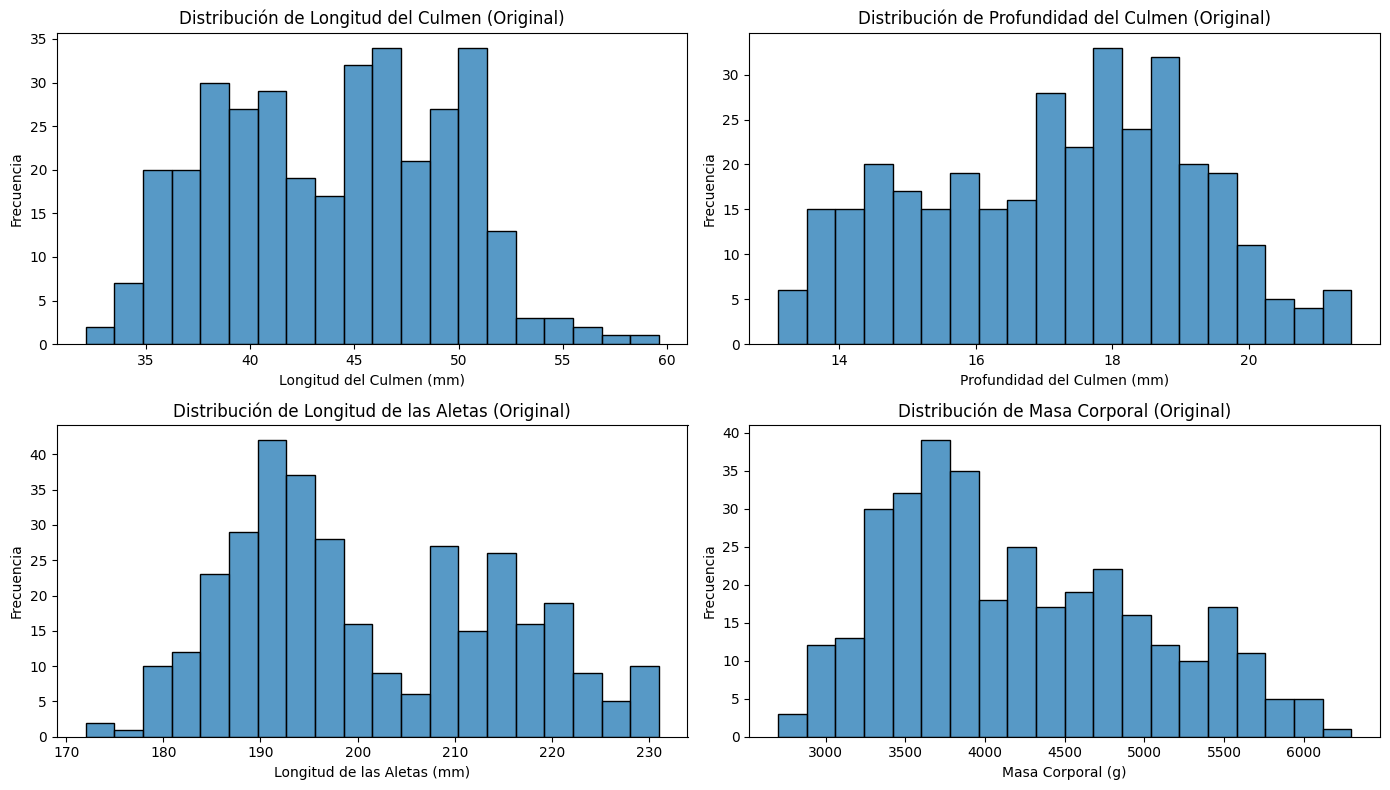

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['Culmen Length (mm)'], bins=20)
plt.title('Distribución de Longitud del Culmen (Original)')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.histplot(df['Culmen Depth (mm)'], bins=20)
plt.title('Distribución de Profundidad del Culmen (Original)')
plt.xlabel('Profundidad del Culmen (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.histplot(df['Flipper Length (mm)'], bins=20)
plt.title('Distribución de Longitud de las Aletas (Original)')
plt.xlabel('Longitud de las Aletas (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.histplot(df['Body Mass (g)'], bins=20)
plt.title('Distribución de Masa Corporal (Original)')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Discretización: Método 1 - Discretización por Bins (Usando pandas.cut)

In [ ]:
df['Culmen Length (mm) Discretized'] = pd.cut(df['Culmen Length (mm)'], bins=3, labels=['Corto', 'Medio', 'Largo'])
df['Body Mass (g) Discretized'] = pd.cut(df['Body Mass (g)'], bins=4, labels=['Muy Bajo', 'Bajo', 'Alto', 'Muy Alto'])

Discretización: Método 2 - Discretización por Percentiles (Usando pandas.qcut)

In [ ]:
df['Culmen Depth (mm) Discretized'] = pd.qcut(df['Culmen Depth (mm)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df['Flipper Length (mm) Discretized'] = pd.qcut(df['Flipper Length (mm)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

Discretización: Método 3 - Usando KBinsDiscretizer de scikit-learn

In [ ]:
kbin_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['Culmen Length (mm) KBins'] = kbin_discretizer.fit_transform(df[['Culmen Length (mm)']])

Recuerdan la leccion sobre inputar valores faltantes?

In [ ]:
imputer = SimpleImputer(strategy='median')
df['Culmen Length (mm)'] = imputer.fit_transform(df[['Culmen Depth (mm)']])

kbin_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['Culmen Length (mm) KBins'] = kbin_discretizer.fit_transform(df[['Culmen Length (mm)']])

Visualización después de la discretización

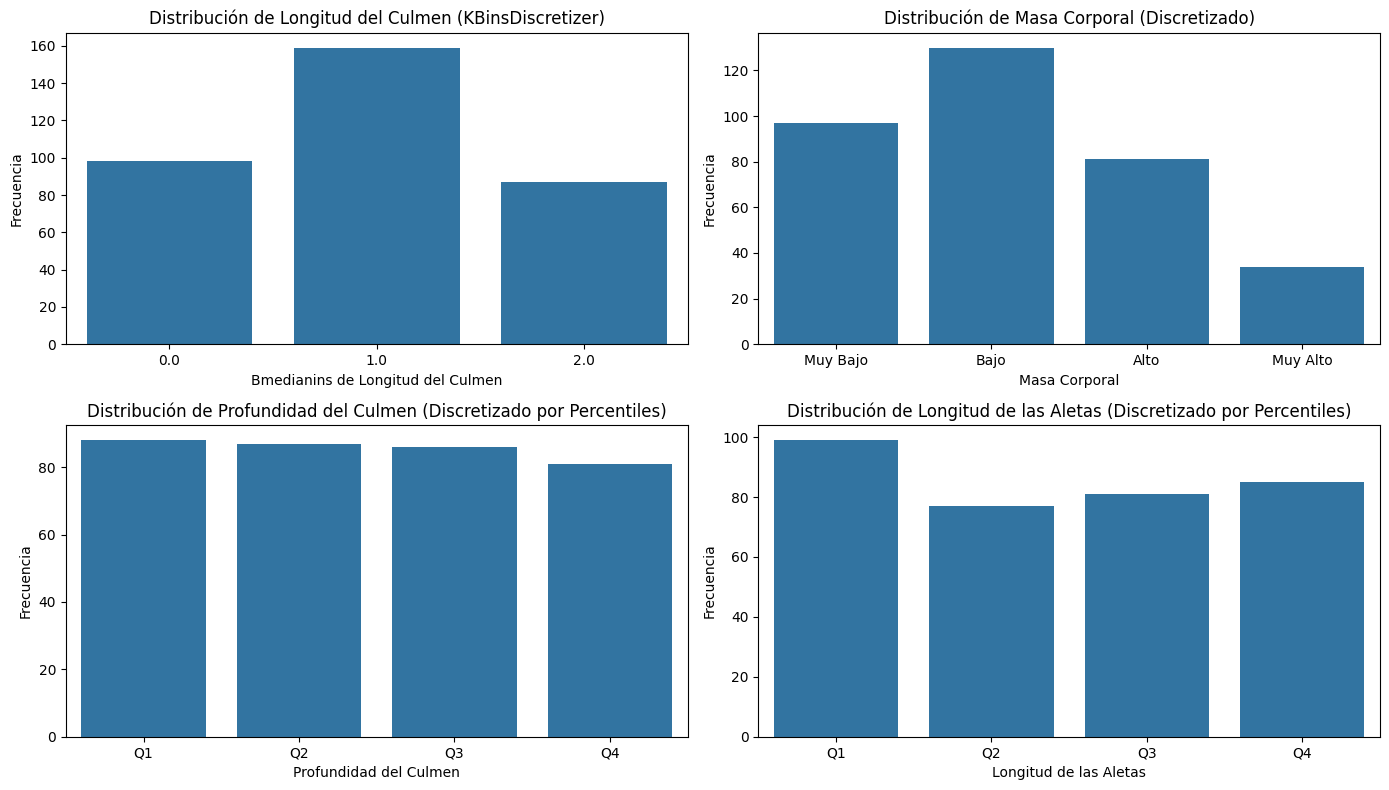

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='Culmen Length (mm) KBins', data=df)
plt.title('Distribución de Longitud del Culmen (KBinsDiscretizer)')
plt.xlabel('Bmedianins de Longitud del Culmen')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 2)
sns.countplot(x='Body Mass (g) Discretized', data=df)
plt.title('Distribución de Masa Corporal (Discretizado)')
plt.xlabel('Masa Corporal')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 3)
sns.countplot(x='Culmen Depth (mm) Discretized', data=df)
plt.title('Distribución de Profundidad del Culmen (Discretizado por Percentiles)')
plt.xlabel('Profundidad del Culmen')
plt.ylabel('Frecuencia')

plt.subplot(2, 2, 4)
sns.countplot(x='Flipper Length (mm) Discretized', data=df)
plt.title('Distribución de Longitud de las Aletas (Discretizado por Percentiles)')
plt.xlabel('Longitud de las Aletas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

## Visualizacion de datos (Parte 1)

Mostrar las primeras filas del DataFrame

In [ ]:
print("Primeras filas del DataFrame:")
df.tail(2)

Primeras filas del DataFrame:


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),...,Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Culmen Length (mm) Discretized,Body Mass (g) Discretized,Culmen Depth (mm) Discretized,Flipper Length (mm) Discretized,Culmen Length (mm) KBins
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,14.8,...,5200.0,FEMALE,8.24246,-26.11969,NaN,Medio,Alto,Q1,Q3,0.0
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,16.1,...,5400.0,MALE,8.36390,-26.15531,NaN,Medio,Alto,Q2,Q3,1.0


Obtener estadísticas descriptivas

In [ ]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Length (mm) KBins
count,344.000000,344.000000,342.000000,342.000000,342.000000,330.000000,331.000000,344.000000
mean,63.151163,17.152035,17.151170,200.915205,4201.754386,8.733382,-25.686292,0.968023
std,40.430199,1.969060,1.974793,14.061714,801.954536,0.551770,0.793961,0.733712
min,1.000000,13.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540,0.000000
25%,29.000000,15.600000,15.600000,190.000000,3550.000000,8.299890,-26.320305,0.000000
50%,58.000000,17.300000,17.300000,197.000000,4050.000000,8.652405,-25.833520,1.000000
75%,95.250000,18.700000,18.700000,213.000000,4750.000000,9.172123,-25.062050,2.000000
max,152.000000,21.500000,21.500000,231.000000,6300.000000,10.025440,-23.787670,2.000000


Visualización de datos - Distribuciones

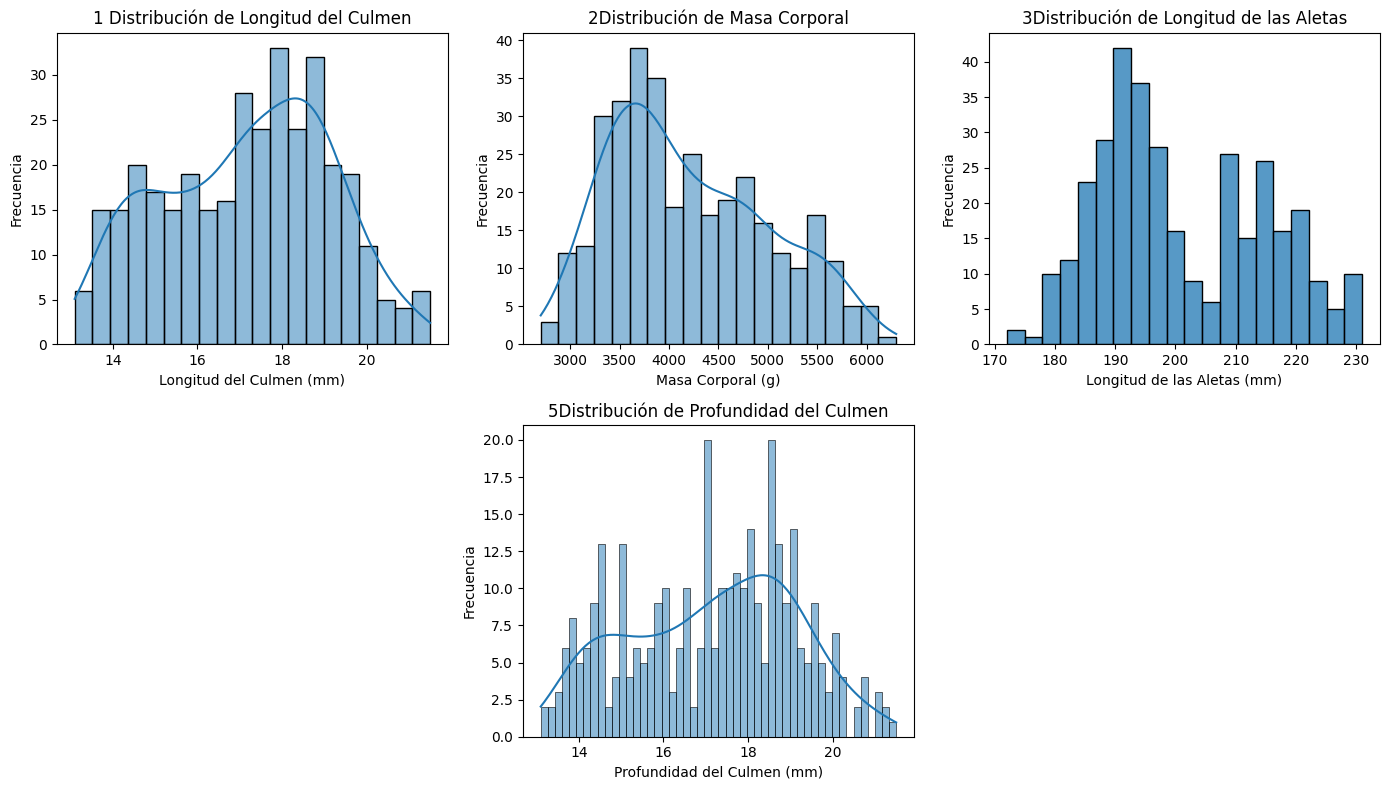

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['Culmen Length (mm)'], bins=20, kde=True)
plt.title('1 Distribución de Longitud del Culmen')
plt.xlabel('Longitud del Culmen (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 5)
sns.histplot(df['Culmen Depth (mm)'], bins=50, kde=True)
plt.title('5Distribución de Profundidad del Culmen')
plt.xlabel('Profundidad del Culmen (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 3)
sns.histplot(df['Flipper Length (mm)'], bins=20)
plt.title('3Distribución de Longitud de las Aletas')
plt.xlabel('Longitud de las Aletas (mm)')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
sns.histplot(df['Body Mass (g)'], bins=20, kde=True)
plt.title('2Distribución de Masa Corporal')
plt.xlabel('Masa Corporal (g)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Visualización de datos - Gráficos de Barras

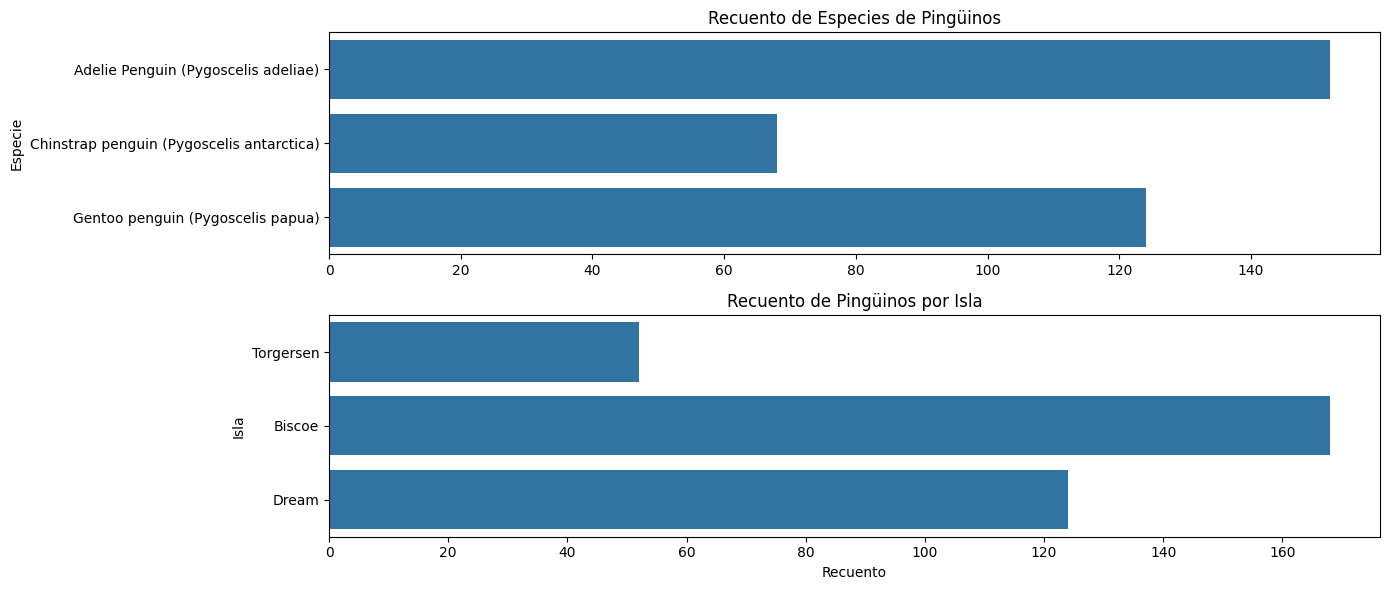

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
sns.countplot(y='Species', data=df)
plt.title('Recuento de Especies de Pingüinos')
plt.ylabel('Especie')
plt.xlabel('')

plt.subplot(2, 1, 2)
sns.countplot(y='Island', data=df)
plt.title('Recuento de Pingüinos por Isla')
plt.ylabel('Isla')
plt.xlabel('Recuento')

plt.tight_layout()
plt.show()

Visualización de datos - Gráficos de Cajas

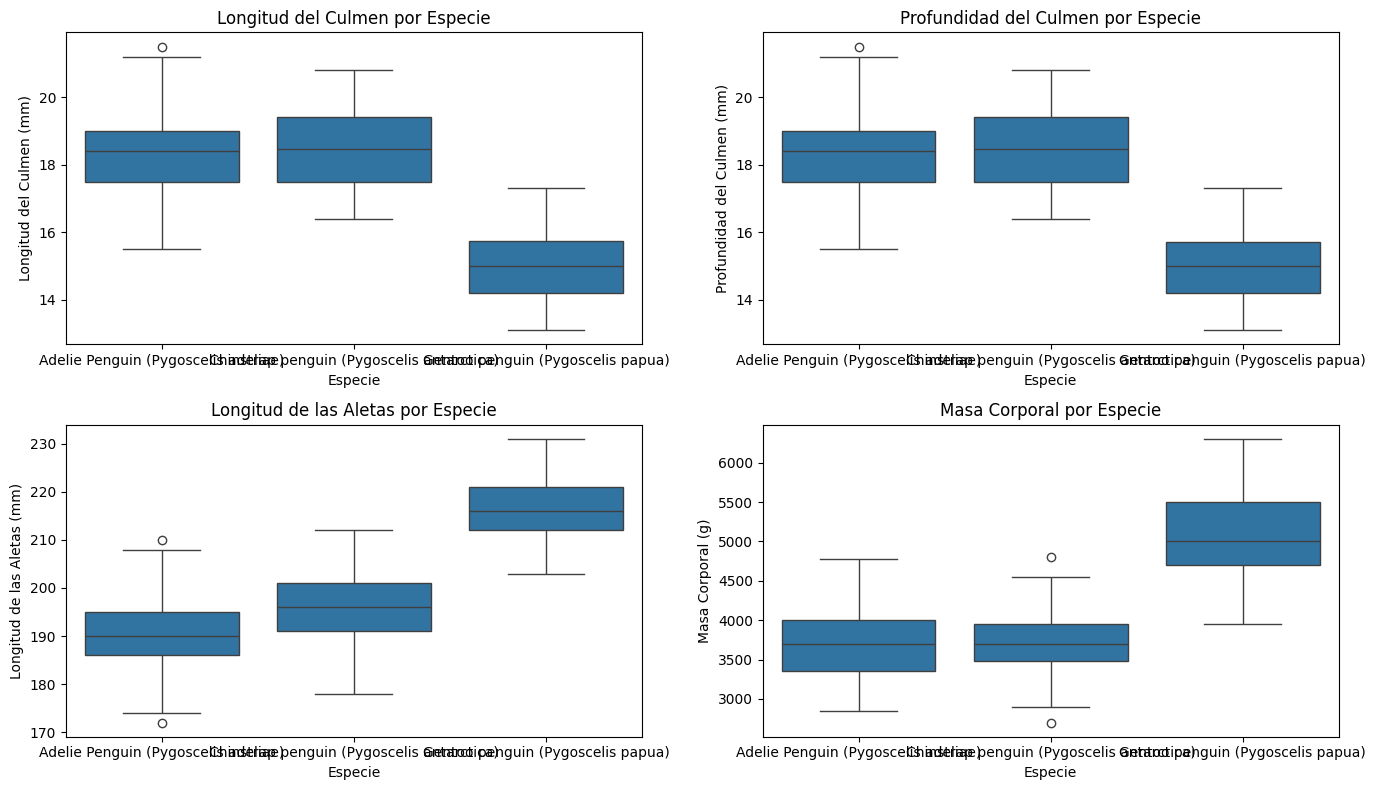

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='Culmen Length (mm)', data=df)
plt.title('Longitud del Culmen por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud del Culmen (mm)')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='Culmen Depth (mm)', data=df)
plt.title('Profundidad del Culmen por Especie')
plt.xlabel('Especie')
plt.ylabel('Profundidad del Culmen (mm)')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='Flipper Length (mm)', data=df)
plt.title('Longitud de las Aletas por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud de las Aletas (mm)')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='Body Mass (g)', data=df)
plt.title('Masa Corporal por Especie')
plt.xlabel('Especie')
plt.ylabel('Masa Corporal (g)')

plt.tight_layout()
plt.show()

Una parte de la visualizacion de datos es saber acomodar las etiquetas

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



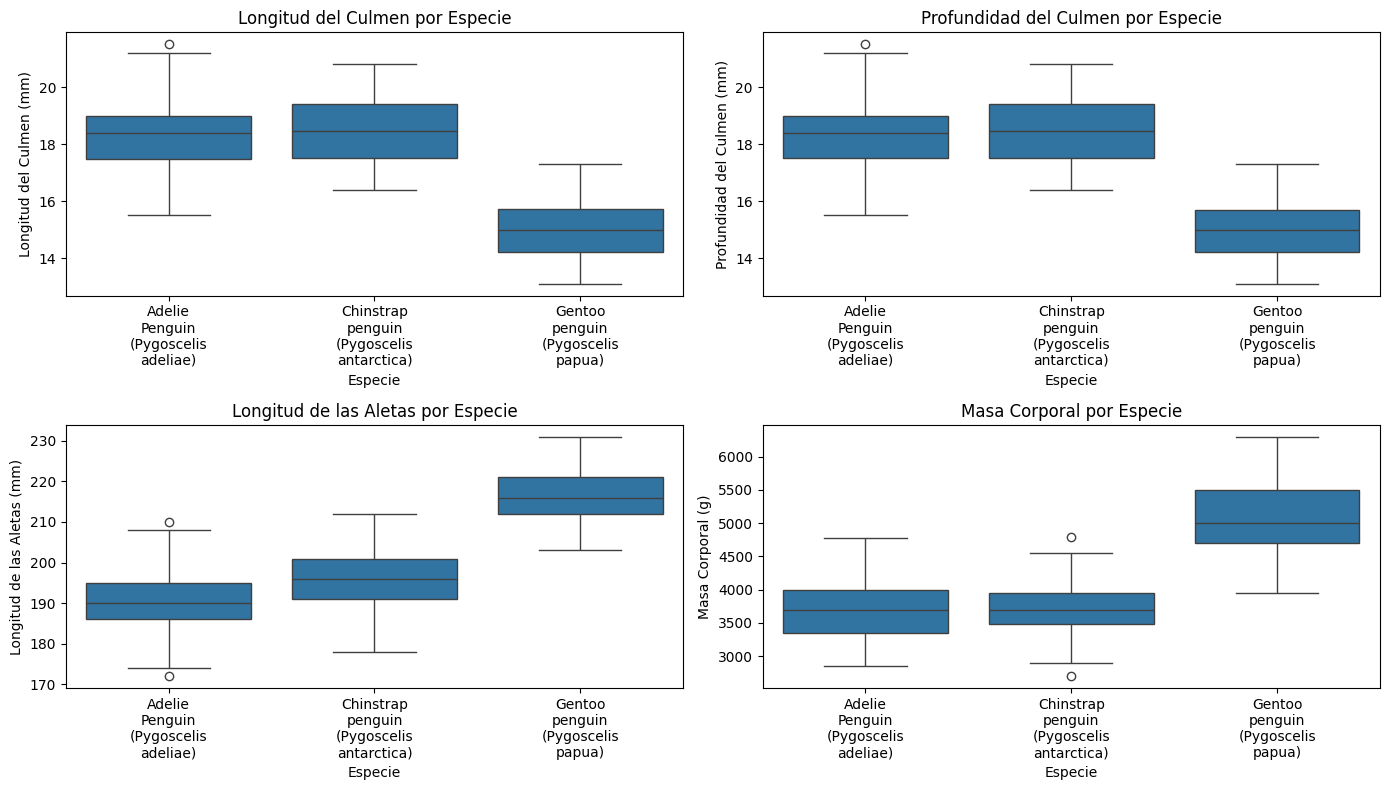

In [ ]:
# Función para ajustar etiquetas en múltiples líneas
def wrap_labels(ax, width, break_long_words=False):
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels = [textwrap.fill(label, width=width, break_long_words=break_long_words) for label in labels]
    ax.set_xticklabels(labels, rotation=0)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='Species', y='Culmen Length (mm)', data=df)
wrap_labels(ax1, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Longitud del Culmen por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud del Culmen (mm)')

plt.subplot(2, 2, 2)
ax2 = sns.boxplot(x='Species', y='Culmen Depth (mm)', data=df)
wrap_labels(ax2, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Profundidad del Culmen por Especie')
plt.xlabel('Especie')
plt.ylabel('Profundidad del Culmen (mm)')

plt.subplot(2, 2, 3)
ax3 = sns.boxplot(x='Species', y='Flipper Length (mm)', data=df)
wrap_labels(ax3, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Longitud de las Aletas por Especie')
plt.xlabel('Especie')
plt.ylabel('Longitud de las Aletas (mm)')

plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x='Species', y='Body Mass (g)', data=df)
wrap_labels(ax4, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Masa Corporal por Especie')
plt.xlabel('Especie')
plt.ylabel('Masa Corporal (g)')

plt.tight_layout()
plt.show()

Visualización de datos - Gráficos de Dispersión

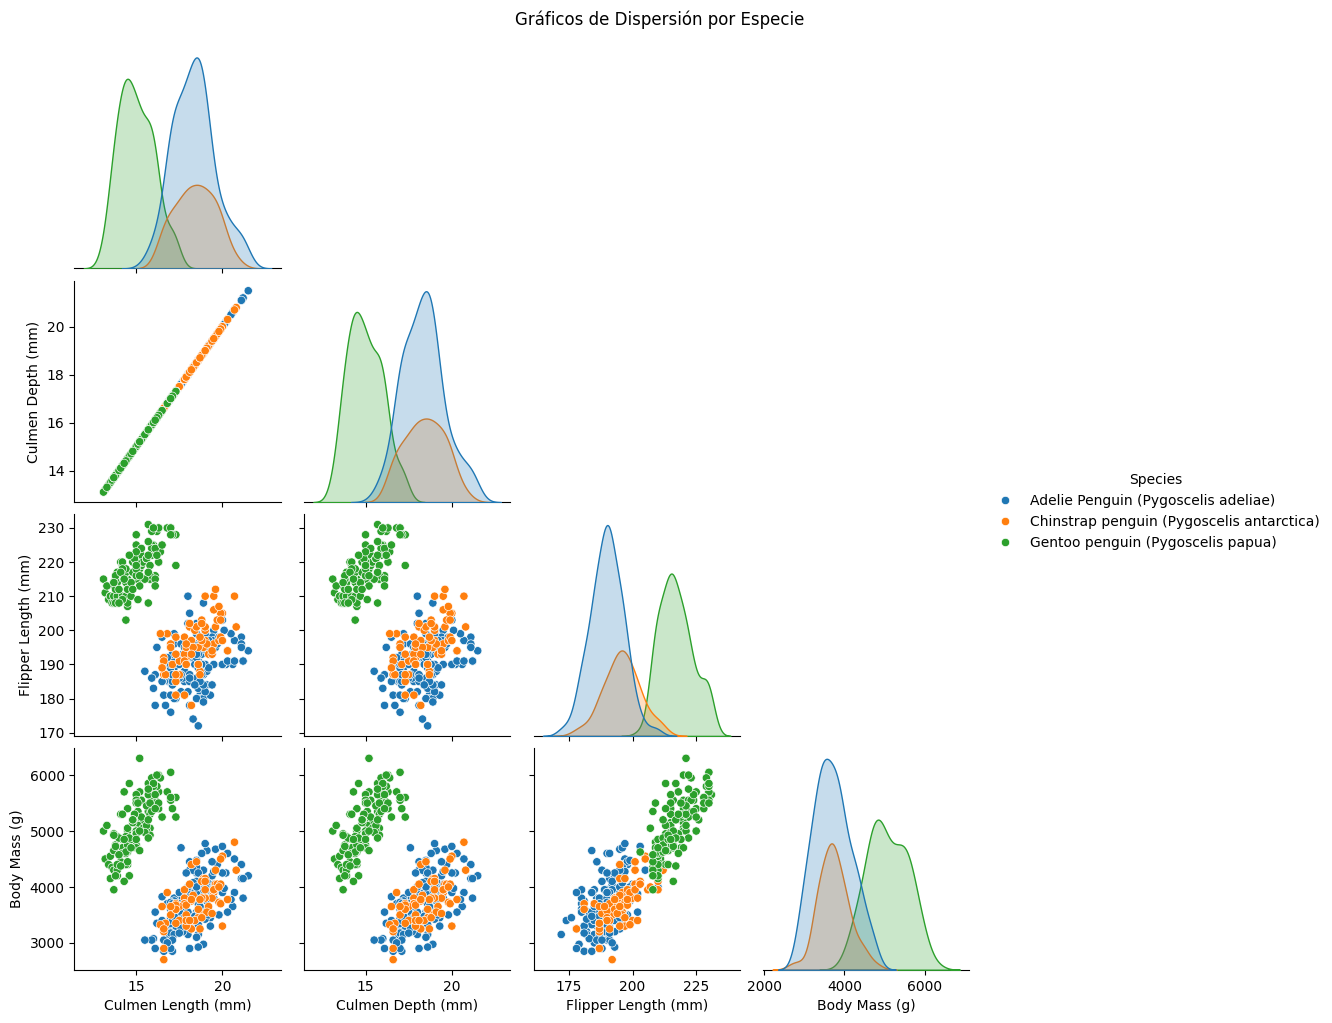

In [ ]:
sns.pairplot(df, hue='Species', vars=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'], corner=True)
plt.suptitle('Gráficos de Dispersión por Especie', y=1.02)
plt.show()

## Gráficos de barras/histogramas
Gráficos de Barras - Recuento de Categorías

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-44-fa1bde34b7bb>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



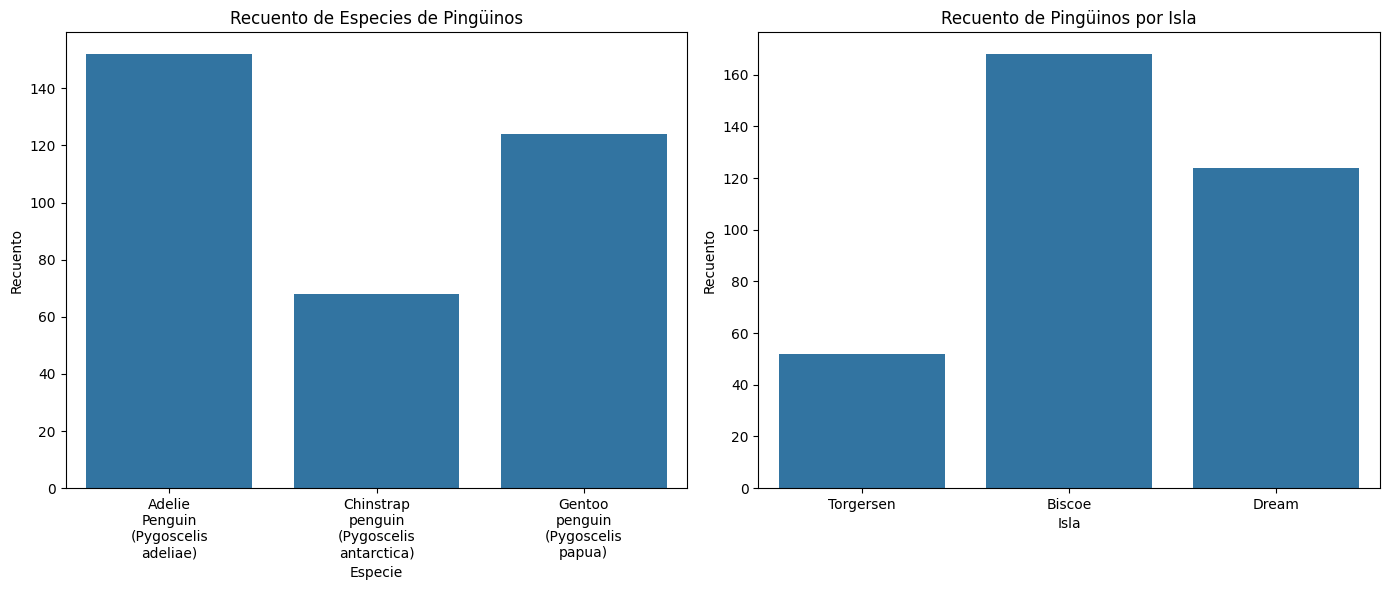

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Species', data=df)
wrap_labels(ax1, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Recuento de Especies de Pingüinos')
plt.xlabel('Especie')
plt.ylabel('Recuento')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Island', data=df)
wrap_labels(ax2, 10)  # Ajustar etiquetas en múltples líneas
plt.title('Recuento de Pingüinos por Isla')
plt.xlabel('Isla')
plt.ylabel('Recuento')

plt.tight_layout()
plt.show()

Gráficos de Barras - Promedio de Longitud del Culmen por Especie

In [ ]:
# Gráfico de barras interactivo
fig = px.bar(df, x='Species', title='Recuento de Especies de Pingüinos')
fig.update_xaxes(title='Especie')
fig.update_yaxes(title='Recuento')
fig.show()lt.tight_layout()

 Histogramas - Distribuciones

In [ ]:
# Crear subplots para Culmen Length y Culmen Depth
fig = go.Figure()

# Histograma para Culmen Length
fig.add_trace(go.Histogram(x=df['Culmen Length (mm)'], name='Culmen Length (mm)', marker_color='skyblue'))

# Histograma para Culmen Depth
fig.add_trace(go.Histogram(x=df['Culmen Depth (mm)'], name='Culmen Depth (mm)', marker_color='salmon'))

# Actualizar diseño del gráfico
fig.update_layout(
    title='Histograma de Culmen Length y Culmen Depth de los Pingüinos',
    xaxis_title='Valor',
    yaxis_title='Recuento',
    barmode='group',  # Superponer histogramas
    bargap=0.1,         # Espacio entre barras
    bargroupgap=0.1,    # Espacio entre grupos de barras
    # Organizar subplots uno al lado del otro
    grid={'rows': 1, 'columns': 2},
)

# Mostrar el gráfico
fig.show()